# Machine Learning Computer Homework 2
## 1: Polynomial Regression
In this question, the dataset contains only one feature that is a real number. We want to learn polynomial regression from degree n=1 to degree n=15 using the linear learning method and determine the best degree n for polynomial by comparing the results. 

You are only required to write code in the sections marked with `TODO:`      
Feel free to contact me via telegram if you have any question: @PouyaSha, @zahrasodagar

In [3]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Three datasets S, V and T have been provided to you. which are in train_data.npy, validation_data.npy and test_data.npy files respectively. As you can see, we use S, V and T respectively for training, choosing the best polynomial degree and error estimation for the best polynomial.

In [4]:
# TODO: load the training, validation and test sets
train_data = np.load('train_data.npy')
validation_data = np.load('validation_data.npy')
test_data = np.load('test_data.npy')


2. Based on the training data S, for each degree of polynomial n=1 to n=15, learn a polynomial with degree n by linear regression method. Call the learned polynomial for n $h_n$. Plot the empirical error of the polynomials $h_n$ for the training data S, which we denote by $L_S(h_n)$ in terms of n.

Text(0, 0.5, 'Empirical Error - LS')

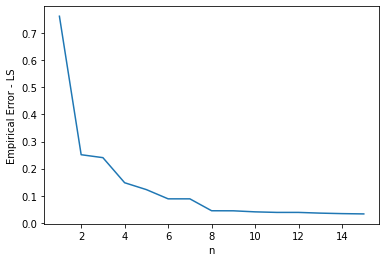

In [18]:
# TODO: learn the polynomial weights using numpy and plot the empirical errors
n = np.arange(1,16,1)
Ls = np.zeros((15,1))

x = train_data[:,0]
y = train_data[:,1]

for i in range(15):
    h = np.poly1d(np.polyfit(x, y, i+1))
    yfit = np.polyval(h,x)
    Ls[i] = np.mean((yfit-y)**2) 

plt.figure()
plt.plot(n,Ls)
plt.xlabel("n")
plt.ylabel("Empirical Error - LS")


3. In order to choose the best polynomial degree, we should not compare $L_S(h_n)$ for different (why?). We get an estimate of $L(h_n)$ based on the dataset V and call it $L_V(h_n)$ which is the average error for dataset V points.
Calculate $L_V(h_n)$ for n=1,...,15 and plot it in terms of n, next to the $L_S(h_n)$ curve from the previous part.

(TODO: YOUR ANSWER)

the best polynomial degree is: 8 and its error is: [0.11129319]


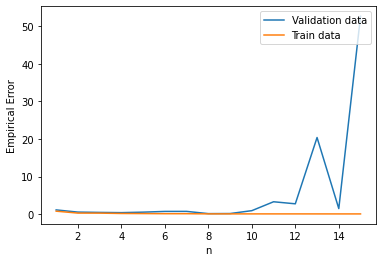

In [73]:
# TODO: plot the errors on both training set and validation set
n = np.arange(1,16,1)
Lv = np.zeros((15,1))

x_val = validation_data[:,0]
y_val = validation_data[:,1]

for i in range(15):
    h = np.poly1d(np.polyfit(x, y, i+1))
    yfit = np.polyval(h,x_val)
    Lv[i] = np.mean((yfit-y_val)**2) 

plt.figure()
plt.plot(n,Lv, label="Validation data")
plt.plot(n,Ls, label="Train data")
plt.xlabel("n")
plt.ylabel("Empirical Error")
plt.legend(loc="upper right")
print("the best polynomial degree is: "+str(np.argmin(Lv)+1)+" and its error is: "+str(Lv[np.argmin(Lv)]))

4. Compare the behavior of $L_S(h_n)$ and $L_V(h_n)$ in terms of n and explain the difference between the two curves.
$\\$
answer: by increasing n, $L_S(h_n)$ decreases because the model become more complicated and by overfitting, estimates the data better. on the other hand, by increasing n, $L_V(h_n)$ first decreases but after a while, because of overfitting the model errors become large.

(TODO: YOUR ANSWER)

5. Using the above results, conclude that the best regression of polynomials in this problem is of
what degree? Which of the two curves $L_S(h_n)$ and $L_V(h_n)$ should be used for this conclusion?
Why?
$\\$
answer: $L_V(h_n)$ should be used to find the best regression; as we see in privious part, by increasing n, $L_S(h_n)$  always decreases because of overfitting so it can't be a good criterion.
based on $L_V(h_n)$ curve, n=8 is the best degree.

(TODO: YOUR ANSWER)

6. Call the best polynomial obtained in clause d as $h^*$. We don’t know the true error value of this polynomial or $L(h^*)$ and again we have to settle for an estimate of it. Therefore, we consider the average error of $h^*$ on the dataset T or $L_T(h_n)$ as the estimate of $L(h^*)$. Calculate $L_T(h_n)$.

    Can you intuitively explain why it is not good to use dataset V to estimate $L(h^*)$ and it is necessary to use a third dataset i.e. T?
    $\\$
    answer: the average of $L_T(h_n)$ is equal to 1.0889236523721288 but $L(h^*)$ is 0.11791425. 

(TODO: YOUR ANSWER)

The average of LT(n) is : 1.0889236523721288
L(h*) is : [0.11791425]


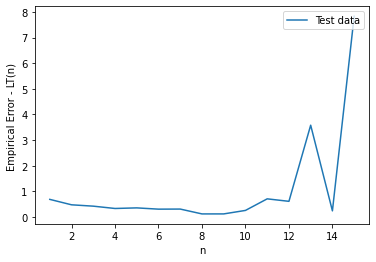

In [75]:
# TODO: report the error on testing dataset
n = np.arange(1,16,1)
LT = np.zeros((15,1))

x_test = test_data[:,0]
y_test = test_data[:,1]

for i in range(15):
    h = np.poly1d(np.polyfit(x, y, i+1))
    yfit = np.polyval(h,x_test)
    LT[i] = np.mean((yfit-y_test)**2) 

plt.figure()
plt.plot(n,LT, label="Test data")
plt.xlabel("n")
plt.ylabel("Empirical Error - LT(n) ")
plt.legend(loc="upper right")

print("The average of LT(n) is : "+ str(np.mean(LT)))
print("L(h*) is : "+str(LT[7]))

#### Bonus
Complete the following functions and implement polynomial regression from scratch. Calculate the errors on all of the three sets and compare the results. What are the other methods that can be used to calculate the weights?

In [77]:
a = np.arange(3)
print(a)

[0 1 2]


In [16]:
def x_transform(X, degrees):
    X_cp = X.copy()
    for degree in degrees:
        # TODO append columns of higher degrees to X
        X = np.append(X, X_cp**degree, axis=1)
    return X


def loss(y, y_hat):
    # TODO Calculate the L2 loss
    loss = np.mean((y_hat - y)**2)
    return loss


def gradients(X, y, y_hat):
    # TODO number of training examples
    m = X.shape[0]
    # TODO gradient of loss with respect to weights
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    # TODO gradient of loss with respect to bias
    db = (1/m)*np.sum((y_hat - y))
    
    return dw, db


def train(X, y, bs, degrees, epochs, lr):
    # TODO shape of the input data
    # the below line is commented because x has only one feature and n should be assigned to 1
    
    m, n = X.shape 
    x = x_transform(X, degrees)
    y = y.reshape(m,1)
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    losses = []
    
    for epoch in range(epochs):
        # TODO list of indices for each batch that is generated randomly
        batches = np.arange((m-1)//bs + 1)
        for batch in batches:
            # TODO x batch
            # TODO y batch
            xb = x[batch*bs: batch*bs + bs].reshape((-1, 1))
            yb = y[batch*bs: batch*bs + bs].reshape((-1, 1))
            
            w = np.zeros((xb.shape))
            
            # TODO calculate the hypothesis using w and b
            y_hat = np.dot(xb, w) + b
            
            dw, db = gradients(xb, yb, y_hat)
            
            # TODO update w with respect to the learning rate
            w -= lr*dw
            # TODO update b with respect to the learning rate
            b -= lr*db
        
        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses


def predict(X, w, b, degrees):
    x1 = x_transform(X, degrees)
    # TODO use w and b to get the predicted values
    y = np.dot(x1, w) + b
    return y

(TODO: YOUR ANSWER)

In [ ]:
# TODO fit the polynomials and evaluate the results using your own functions and 
# compare it to the previous section

x = train_data[:,0]
y = train_data[:,1]
x = x.reshape(-1,1)

w, b, l = train(x, y, bs=4, degrees=[2], epochs=100,
                lr=0.01)
# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(x, y, 'y.')
plt.plot(x, predict(x, w, b, [2]), 'r.')
plt.legend(["Data", "Polynomial predictions"])
plt.xlabel('X - Input')
plt.ylabel('y - target / true')
plt.title('Polynomial Regression')
plt.show()